In [141]:
devtools::load_all()
library(RPostgres)
library(DT)
library(gridExtra)
library(ggplot2)
if (!require(reshape2)) { install.packages("reshape2") }
library(reshape2)
if (!require(rpivotTable)) { install.packages("rpivotTable")}
library(rpivotTable)

c <- benchbuild::login("bb")
library(repr)
options(repr.plot.width=12, repr.plot.height=8)

Loading benchbuild


In [71]:
exps <- benchbuild::get_experiments(c)
exps[exps$name == 'pj',]

,name,id,description
2,pj,b53c1f2a-beb2-46c4-b03d-66535f19ffc0,2016-09-14 10:56:56.797363
3,pj,4c9cb146-0efb-4a72-ae51-bc5b79b1fe77,2016-09-14 10:56:56.797363
4,pj,b9e5427a-5a4d-4ab3-bdb1-ab2f976f2966,2016-09-14 10:56:56.797363
5,pj,3ae781fd-ffc4-47e6-9eec-a0a24f648227,2016-09-14 10:56:56.797363
6,pj,50c0dd2e-f7c9-40c1-9ffb-33b4b493347e,2016-09-14 10:56:56.797363
7,pj,7bd490e5-85b3-47dc-a710-c42eec8da2ff,2016-09-14 10:56:56.797363
8,pj,e26c33d1-a430-4870-b6e5-5909c91138b2,2016-09-14 10:56:56.797363
9,pj,aedb1958-c4c4-42cf-8c8c-b1159189b0e4,2016-09-14 10:56:56.797363
10,pj,b39d5bdc-008f-4558-813c-d40c0b845546,2016-09-14 10:56:56.797363
11,pj,3c542482-661c-44ab-b2e6-80b5527821d3,2016-09-14 10:56:56.797363


In [142]:
plot_comparison_data <- function(selected) {
  exps <- exps[exps$id %in% selected,]$id
  plot_data <- benchbuild::region_wise_comparison(c, exps)
  return(plot_data)
}

plot_comparison <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(x=cores, y=speedup, color = cores)) +
    geom_point() +
    coord_cartesian(ylim = c(-10,10)) +
    facet_wrap(~ project)
      theme(axis.text = element_text(size = 8), axis.text.x = element_text(angle = 45, hjust = 1),
              legend.position="none")
  return(plot)
}

scatter_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=runtime_jit, color=cores)) +
    scale_x_log10() +
    geom_point(size=0.5) +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(-10,10)) +
    facet_wrap(~ cores) +
    geom_smooth(method=lm, se=TRUE, fullrange=TRUE, size=0.5) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

box_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=cores, color=cores)) +
    #geom_boxplot() +
    geom_violin() +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(-10,10)) +
    #facet_wrap(~ t) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

project_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=project, color=cores)) +
    geom_point(size=0.2) +
    geom_jitter() +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(-10,10)) +
    #facet_wrap(~ t) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}


In [143]:
#data <- plot_comparison_data(c(
#    '0f42573f-973d-4cd4-bfac-b71961d100ed',
#    '09de35a6-f0af-4577-91a2-a564b63ef900'
#))
data <- plot_comparison_data(c(
    '9fd28f1b-8a9e-4d99-b495-e3b18fe9d347',
    '45d076f4-52b7-4d38-8cea-4e1d64714aed',
    'd5c856a3-4f78-4988-b43f-a349d246eab2',
    '923a551e-0fb2-4b67-af6c-89bbe66d379a',
    'bd9878da-55a1-4b81-bcde-0e050a6fc9e2',
    'be9aca89-c6c0-44e5-870c-83ca39d5cb80',
    'f5ecd111-d754-494a-aa12-32a9669d3a80'
    
))
data$region_name <- as.numeric(factor(data$region_name))
#data

Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”

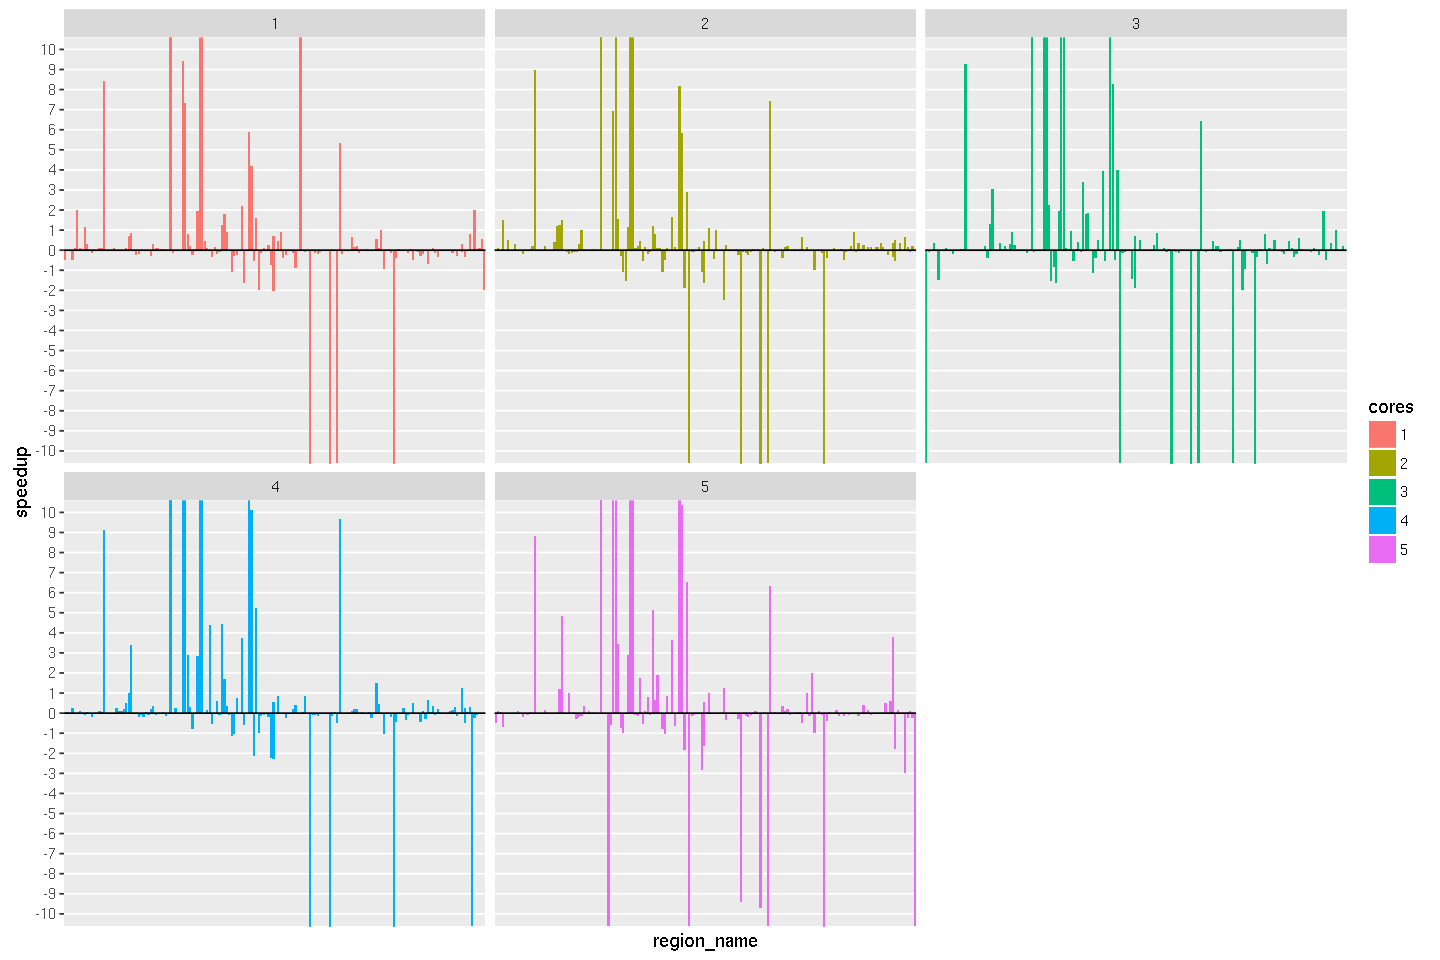

Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”

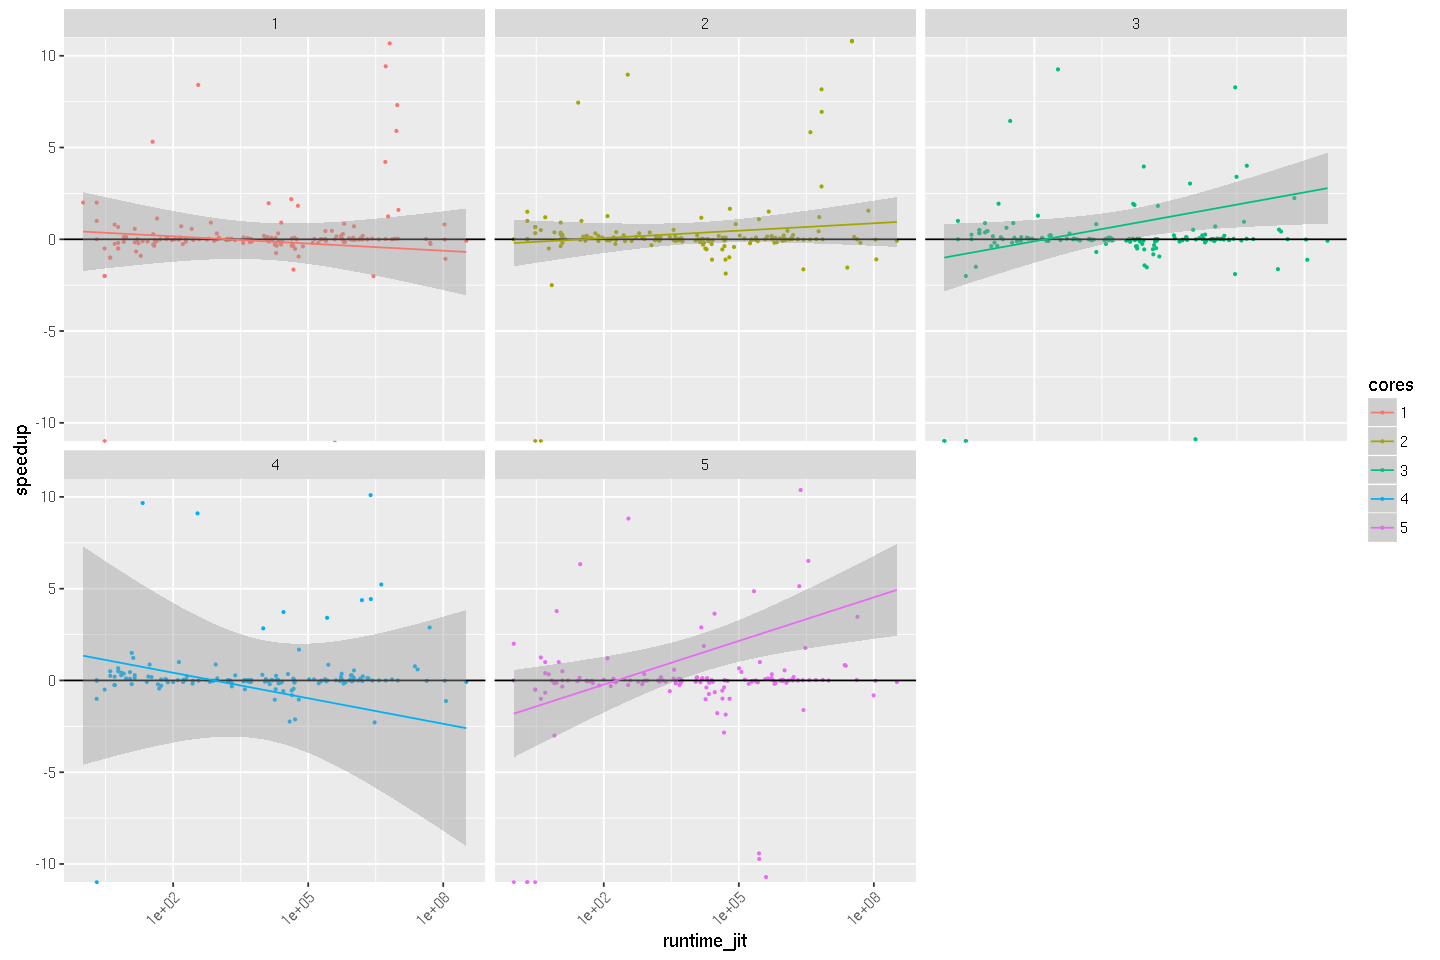

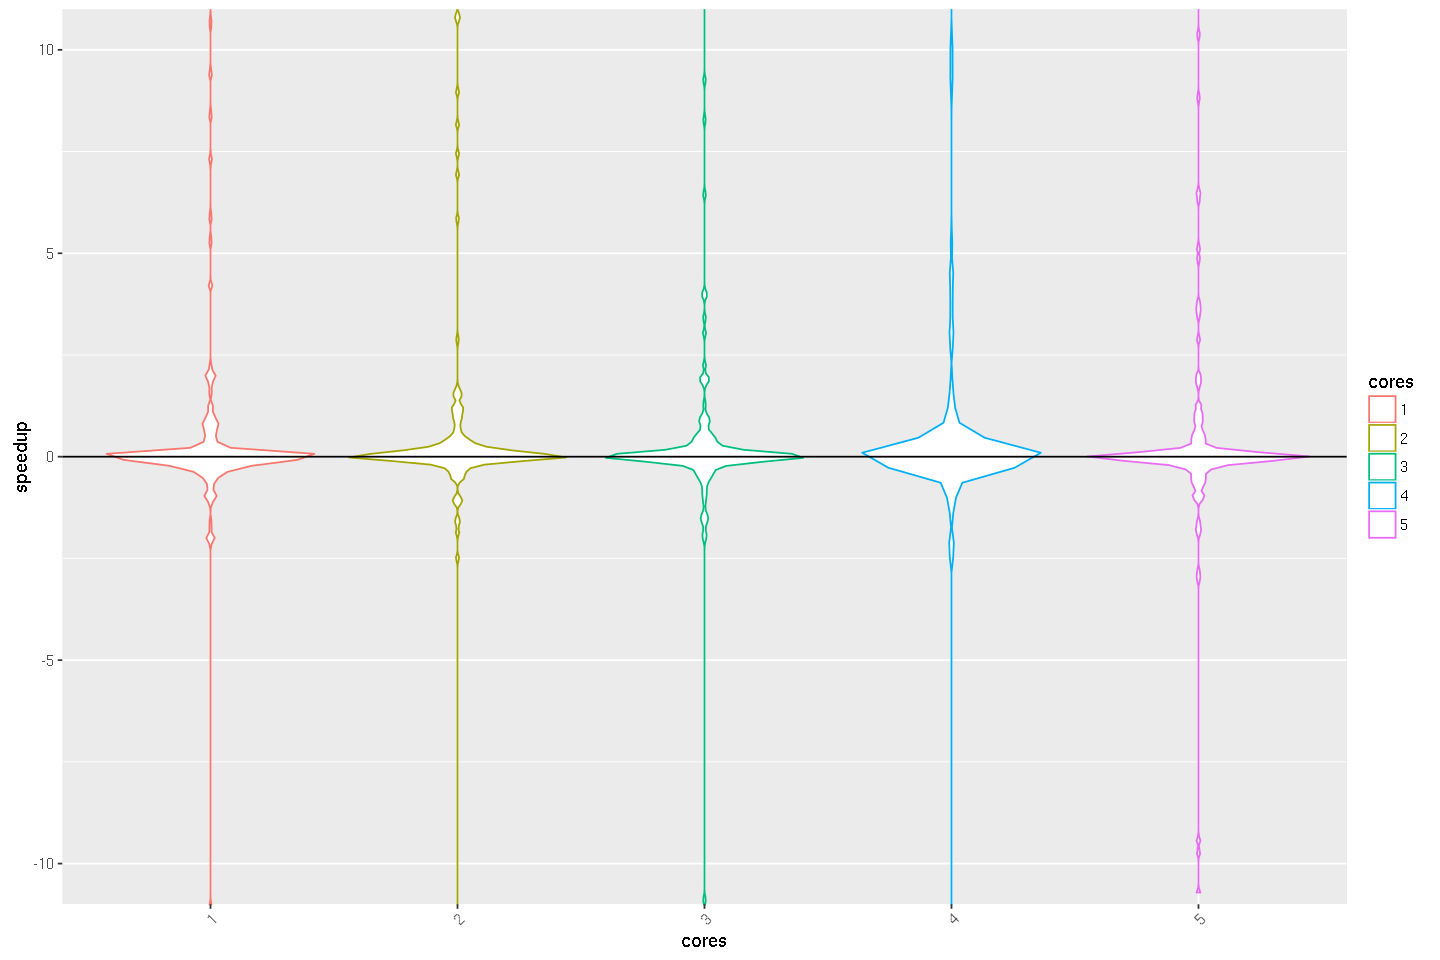

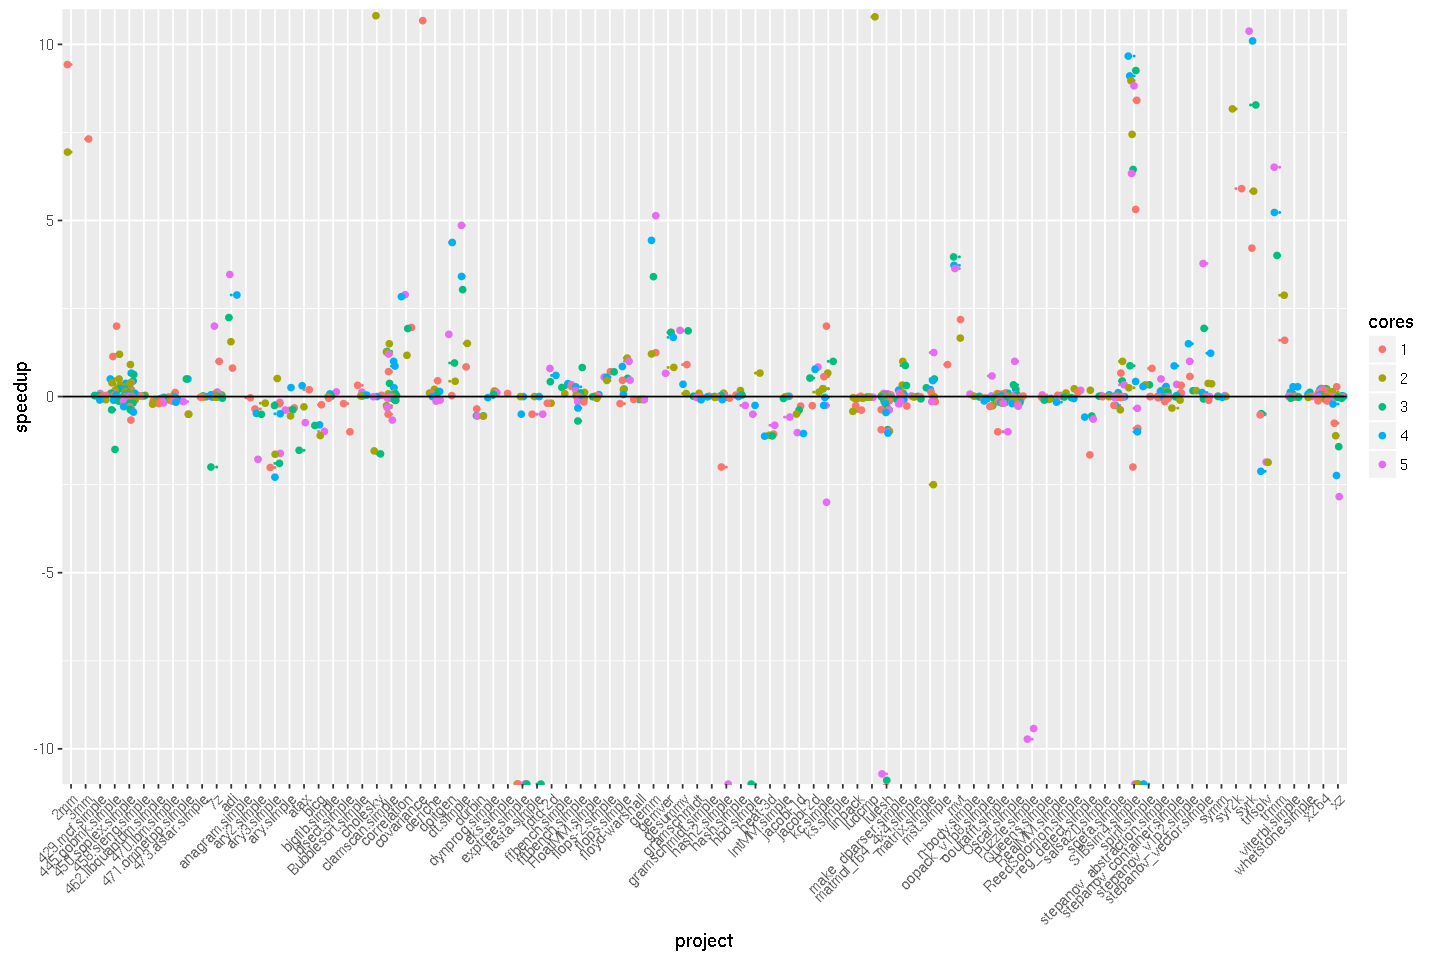

In [144]:
bar_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=region_name, fill=cores)) +
    geom_bar(stat="identity", position="dodge") +
    geom_hline(yintercept=0) +
    facet_wrap(~ cores) +
    coord_cartesian(ylim = c(-10,10)) +
    scale_x_discrete() +
    scale_y_discrete(limits = c(-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10))
    theme(axis.text = element_text(size = 8))
    #,
    #      axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

data_filter <- transform(data, speedup = ifelse(speedup >= 1, speedup-1, -1/speedup+1))
data_filter <- data_filter[complete.cases(data_filter),]
#data_filter <- data_filter[(as.numeric(data_filter$cores) %% 2) == 0,]
data_filter <- data_filter[(data_filter$speedup < 100),]
#data_filter <- data_filter[(data_filter$speedup > 0.15),]

bar_plot(data_filter)
scatter_plot(data_filter)
box_plot(data_filter)
project_plot(data_filter)

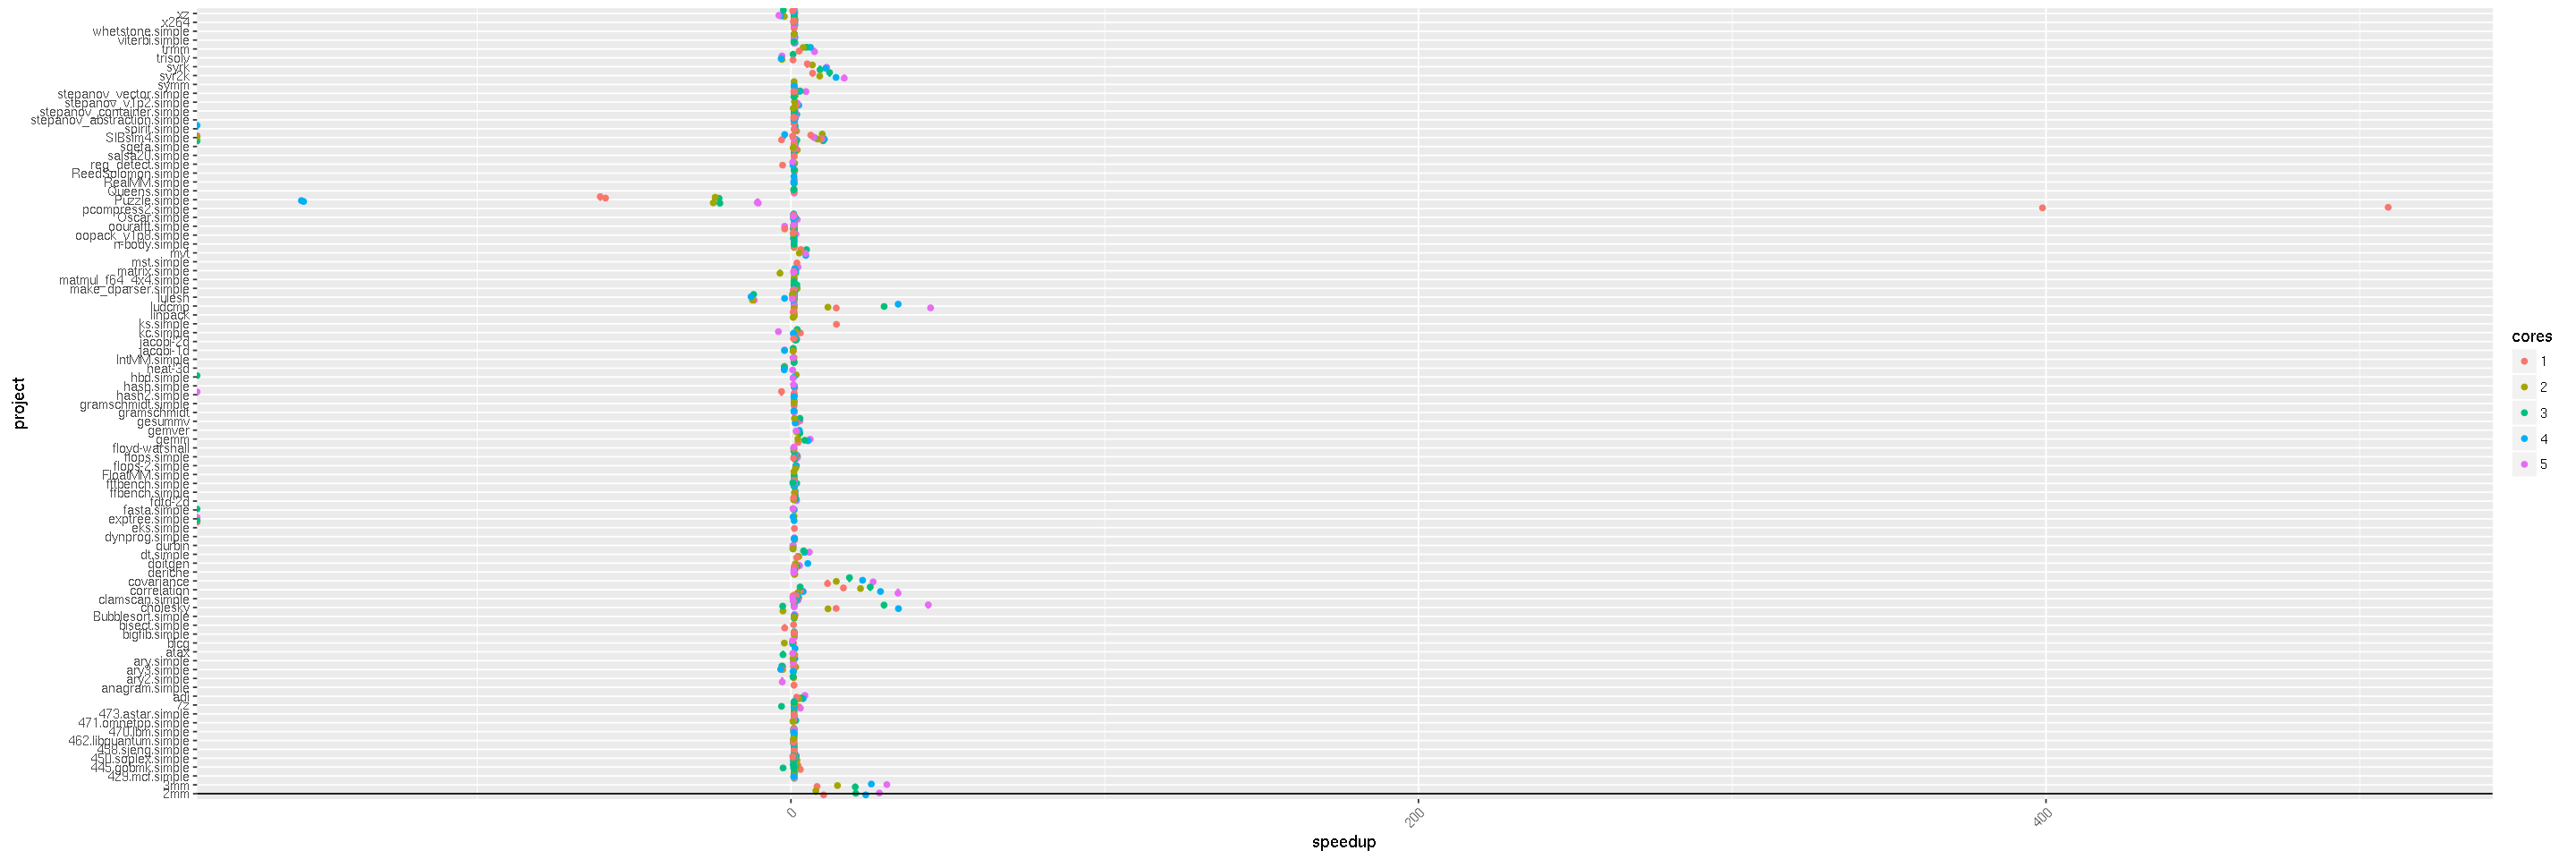

In [113]:
project_y_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(x=speedup, y=project, color=cores)) +
    geom_point(size=0.2) +
    geom_jitter() +
    geom_hline(yintercept=1) +
    #facet_wrap(~ t) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}
project_y_plot(data_filter)

In [ ]:
data

In [ ]:
timings_ <- timings[timings$speedup < 100,]
timings_ <- timings_[timings_$speedup > 1.5,]

scatter_plot(timings_)
box_plot(timings_)
project_plot(timings_)

In [ ]:
timings <- plot_comparison_data(c(
  'e86d9201-e4e7-44ee-8f99-defd926d00ff' # polybench
))
compare <- plot_comparison_data(c(
  '2efda1d1-bcb4-4f79-80ef-f7647c909cdb' # polybench
))

In [ ]:
# Compare 2 configurations of polybench
scatter_plot(timings)
scatter_plot(compare)

In [ ]:
scatter_plot(timings)
box_plot(timings)
project_plot(timings)

In [ ]:
#timings <- plot_comparison_data(c(
#  'e86d9201-e4e7-44ee-8f99-defd926d00ff' # polybench
#))
compare <- plot_comparison_data(c(
  'd9e5987d-7a45-4108-99b5-c5dd8ed97410',
  '5751aae6-ffaa-40bc-a401-b6065b2b4bf9',
  'e173e321-7d06-4da1-a59f-c856ef258d9d'
))
# Compare 2 configurations of polybench
scatter_plot(timings)

compare_ <- compare[compare$speedup < 16,]
scatter_plot(compare_)

In [ ]:
#pre_fixes <- plot_comparison_data(c('aedb1958-c4c4-42cf-8c8c-b1159189b0e4',
#    'b39d5bdc-008f-4558-813c-d40c0b845546',
#    '3c542482-661c-44ab-b2e6-80b5527821d3'))
#post_fixes <- plot_comparison_data(
#  c('ca727be8-e39a-48d1-97be-7e65c4eaf979',
#    '054e36e6-283c-4b6b-ab7b-cfe7fecb540e',
#    '7cfc5a22-e8c3-4a73-acf8-83990916ec3e'))
#timings <- plot_comparison_data(c('4e885dd3-e9e9-4f41-8fdd-6bd0ce561cf0',
#                                  '627bbc1a-c912-40cb-87f3-4252d4054b63',
#                                  '9088272d-cafd-4842-b684-feaed241dc64',
#                                  '1913a7b0-c4d0-4609-8648-68485569f38d'))
#timings <- plot_comparison_data(c('90cd547c-5268-43a3-9816-179cbc2905a2',
#                                  'a1e01c6d-404d-4c3a-ba89-835dc5e79ee4',
#                                  'd9ae2d57-c73b-41cd-8fa4-68d0255a6915'))
#timings <- plot_comparison_data(c('dc206f05-b30f-4dd1-861b-bd113a89d6b8'))
#timings <- plot_comparison_data(c('14ddd62c-0c24-4bd7-972a-422d14dd4504'))
#timings <- plot_comparison_data(c('4ce6fe76-1be2-48f7-a20c-7d6f46390955'))

timings <- plot_comparison_data(c(
  '44eb0e7b-b883-42d6-a562-a891c4185bb6', # polybench
  '9fd79172-f186-4801-8426-d58e2099800b', # benchbuild
  'aec61fbe-89c7-4bc5-adeb-9f79daba6029'  # lnt
))
